In [1]:
# !pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util

In [2]:
# Initialize the model
NLPmodel = SentenceTransformer('./sentence-transformers_all-MiniLM-L6-v2') # SentenceTransformer('all-MiniLM-L6-v2')

## Use our data

In [4]:
# import other packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
param_name = 'playfight'

In [6]:
expt_type = 'playfight/without_cover_story/'
rootfile_loc = f'../../data/text_responses/{expt_type}'

In [7]:
df =  pd.read_csv(f'{rootfile_loc}/data_triallevel_sorted.csv',index_col=[0])
# df =  pd.read_csv('../data/collected_data/data_triallevel_sorted.csv',index_col=[0])
df.head()

,subID,stimset_rows,chargeSpeed,stim_dur,responses,movie,trial_num
1,28000,26,1.5,8234,collided and then bounced off each other,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,1
1,28001,25,1.5,8130,"The dots moved apart, and then came back toget...",e838dadb-c02f-4273-ae93-210720dcd06c,1
3,28002,28,1.5,8325,softy hit twice,b3a507ff-2289-4ad3-8922-1a3d0532e154,3
6,28003,29,1.5,8085,The dots wandered and came together almost inc...,1b1159fc-de2b-4ae5-a736-d98d8524a366,6
4,28004,32,1.5,8069,softer collisons,1f6c6525-a740-48c2-8dfc-9c4fb520c630,4


## NLP algo

In [29]:
words_to_compare = df['responses'].to_list()
words_to_compare = [s.lower() for s in words_to_compare]
words_to_compare

['collided and then bounced off each other',
 'the dots moved apart, and then came back together, in a slow, fluid motion over and over',
 'softy hit twice',
 'the dots wandered and came together almost incidentally the first time, and then intentionally the second time.',
 'softer collisons',
 'slow coming together',
 'slowly connect',
 "dot moves slowly around. hit each other twice. didn't touch edges",
 'the dots slowly gravitate towards eachother and collide then bounce away again',
 'meandering',
 'slow collision ',
 'crash',
 'collision',
 'the dots seemed to move more gently this time and almost met each other gently twice instead of colliding with each other this time.',
 'the two dots hit eachother twice and they did it very slowly',
 'the dots alternated at a normal speed between pulling apart and drawing together',
 'touches',
 'slow speed bumper cars',
 'the dots moved a little slower & moved together twice.',
 'the grey dot slowly swept towards the black dot, the black red

In [30]:
excluded_words_list = ['dots','dot','around','dont know',"don't know",'black','grey','gray', 'color', 'colors','shape', 'shapes', 'one', 'ones','ball',\
    'balls','twice', '.', ';', ':', '-', ' the ', ' and ', ' a ', ' an ', ' is ', ' are ', ' and ', ' or ', 'between']

In [31]:
def skip_excluded_words(txt):
    txt = txt.lower()
    for words in excluded_words_list:
        txt = txt.replace(words,' ')
    return txt

skip_excluded_words('This is black.')

'this   '

In [32]:
# words_to_compare = [skip_excluded_words(i) for i in words_to_compare]
# words_to_compare[:5]

In [33]:
# ref_words = ['follow','chase','wander','move','independent', 'moveInd']
# ref_words = ['play','fight','wander','move','independent','play_fight']
ref_words = ['play','fight', 'play_fight']

In [34]:
# Encode the reference phrase and the words to compare

similarity_all_1 = []
similarity_all_2= []

for ref_word in ref_words[:-1]:

    # if ref_word == 'play_fight':
    #     continue
    # else:
    reference_embedding = NLPmodel.encode(ref_word)

    data_embeddings = NLPmodel.encode(words_to_compare)

    # Compare and print similarities
    for embedding in data_embeddings:

        similarity = util.pytorch_cos_sim(reference_embedding, embedding) # similarity between ref word and each response
        
        if ref_word in ['play','playing']:
            similarity_all_1.append(similarity.item())

        if ref_word in ['fight','fighting']:
            similarity_all_2.append(similarity.item())

df['similarity_play'] = similarity_all_1
df['similarity_fight'] = similarity_all_2
df['similarity_play_fight'] = df['similarity_play'] - df['similarity_fight']

In [35]:
df.sort_values(by=['chargeSpeed','subID'],inplace=True)
df

,subID,stimset_rows,chargeSpeed,stim_dur,responses,movie,trial_num,similarity_play,similarity_fight,similarity_play_fight
1,28000,26,1.5,8234,collided and then bounced off each other,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,1,0.201738,0.291751,-0.090013
1,28001,25,1.5,8130,"The dots moved apart, and then came back toget...",e838dadb-c02f-4273-ae93-210720dcd06c,1,0.117418,0.051354,0.066064
3,28002,28,1.5,8325,softy hit twice,b3a507ff-2289-4ad3-8922-1a3d0532e154,3,0.225038,0.211082,0.013956
6,28003,29,1.5,8085,The dots wandered and came together almost inc...,1b1159fc-de2b-4ae5-a736-d98d8524a366,6,0.094942,0.021826,0.073116
4,28004,32,1.5,8069,softer collisons,1f6c6525-a740-48c2-8dfc-9c4fb520c630,4,0.139688,0.159685,-0.019997
...,...,...,...,...,...,...,...,...,...,...
5,28098,64,9.0,8001,Dots collided twice.,8649b489-429a-4894-9c74-827e94f04566,5,0.174529,0.189728,-0.015199
2,28099,63,9.0,9976,The dots periodically collided,9301277e-6b35-4aa7-bd52-4f56ae0f029b,2,0.146527,0.161027,-0.014500
6,28100,66,9.0,8060,the animations speedily hit each other,9f7e489f-4076-4332-b57e-13a42d4c75fd,6,0.151348,0.214418,-0.063069
0,28101,65,9.0,8018,"the dot fighting, hitting each other",5b2465b2-47b6-4cc7-b06f-c362ff7454f8,0,0.326928,0.475535,-0.148607


In [36]:
rootfile_loc

'../../data/text_responses/playfight/without_cover_story/'

In [37]:
df.to_csv(f'{rootfile_loc}/NLP_analyses/data_with_similarity_scores.csv')

# Figures

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

s=14 # CHANGE FONTSIZE HERE
plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend

color_plots = 'tab:red' # or tab:red

In [39]:
# inds = [[0,0],[0,1],[1,0],[1,1],[1,2],[0,2]]
# words_pos_dict = dict(zip(ref_words,inds))
# words_pos_dict

In [40]:
out_loc = '../../results/text_analysis/pf/no_cover_story/'

In [41]:
param_name = 'chargeSpeed'

In [42]:
df.groupby(['chargeSpeed']).mean()

,subID,stimset_rows,stim_dur,trial_num,similarity_play,similarity_fight,similarity_play_fight
chargeSpeed,,,,,,,
1.50,28051.0,50.203883,8209.699029,3.252427,0.184036,0.193896,-0.009860
2.75,28051.0,50.203883,8208.029126,3.194175,0.191860,0.218115,-0.026255
4.00,28051.0,50.203883,8223.747573,2.747573,0.191690,0.223568,-0.031878
5.25,28051.0,50.203883,8192.621359,2.766990,0.192769,0.220050,-0.027280
6.50,28051.0,50.203883,8210.592233,2.834951,0.193301,0.233577,-0.040277
7.75,28051.0,50.203883,8092.737864,3.194175,0.194891,0.245317,-0.050426
9.00,28051.0,50.203883,8162.378641,3.009709,0.196125,0.256029,-0.059905


In [43]:
ref_words

['play', 'fight', 'play_fight']

In [45]:
out_loc

'../../results/text_analysis/pf/no_cover_story/'

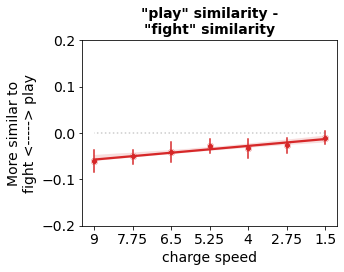

In [47]:
# nrows,ncols = 2,3
# fig,axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12,6), sharey = False)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize = (5,4))


word = 'play_fight'
sns.lineplot(data=df.reset_index(),x = param_name,y = 'similarity_' + word,\
    ax=ax,marker = 'o', ls = 'None', color = color_plots, err_style='bars')
sns.regplot(data=df.groupby([param_name]).mean().reset_index(),x = param_name,y = 'similarity_' + word,\
    ax=ax,marker = 'o', color = color_plots)
ax.set_xticks(np.unique(df[param_name]))
if word != 'play_fight':
    ax.set_title(f'"{word}" similarity', fontweight = 'bold')
    ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
else:
    ax.set_title(f'"play" similarity -\n"fight" similarity', fontweight = 'bold')
    ax.hlines(0,1.5,9,color = 'grey',ls = ':',alpha=.4)
    ax.set_yticks([-.2,-.1,0,0.1,0.2])
    ax.set_ylabel('More similar to\nfight <-----> play')

ax.set_xlabel('charge speed')
        
ax.set_xticks(np.arange(1.5,9.1,1.25),['1.5','2.75','4','5.25','6.5','7.75','9'])
ax.invert_xaxis()

plt.tight_layout()
plt.savefig(f'{out_loc}word_similarity.png',dpi=300,bbox_inches ='tight')

### Stat + plots

In [32]:
from pymer4.models import Lmer
from pymer4.stats import vif
from scipy.stats import zscore

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [33]:
df['chargeSpeed'] = zscore(df['chargeSpeed'])
df

,subID,stimset_rows,chargeSpeed,stim_dur,responses,movie,trial_num,similarity_play,similarity_fight,similarity_wander,similarity_move,similarity_independent,similarity_play_fight
1,28000,26,-1.5,8234,collided and then bounced off each other,29e7c94f-a6bf-4f1d-8ea1-46efbdb6a836,1,0.201738,0.291751,0.011042,0.137910,0.097092,-0.090013
1,28001,25,-1.5,8130,"The dots moved apart, and then came back toget...",e838dadb-c02f-4273-ae93-210720dcd06c,1,0.117418,0.051354,0.100934,0.185441,0.097920,0.066064
3,28002,28,-1.5,8325,softy hit twice,b3a507ff-2289-4ad3-8922-1a3d0532e154,3,0.225038,0.211082,0.079697,0.149783,0.104342,0.013956
6,28003,29,-1.5,8085,The dots wandered and came together almost inc...,1b1159fc-de2b-4ae5-a736-d98d8524a366,6,0.094942,0.021826,0.198140,0.046028,0.094452,0.073116
4,28004,32,-1.5,8069,softer collisons,1f6c6525-a740-48c2-8dfc-9c4fb520c630,4,0.139688,0.159685,0.127509,0.193303,0.107612,-0.019997
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,28098,64,1.5,8001,Dots collided twice.,8649b489-429a-4894-9c74-827e94f04566,5,0.174529,0.189728,0.058756,0.091745,0.095487,-0.015199
2,28099,63,1.5,9976,The dots periodically collided,9301277e-6b35-4aa7-bd52-4f56ae0f029b,2,0.146527,0.161027,0.029164,0.081012,0.086534,-0.014500
6,28100,66,1.5,8060,the animations speedily hit each other,9f7e489f-4076-4332-b57e-13a42d4c75fd,6,0.151348,0.214418,0.031086,0.214322,0.043774,-0.063069
0,28101,65,1.5,8018,"the dot fighting, hitting each other",5b2465b2-47b6-4cc7-b06f-c362ff7454f8,0,0.326928,0.475535,0.161905,0.236980,0.139049,-0.148607


In [34]:
ref_words

['play', 'fight', 'wander', 'move', 'independent', 'play_fight']

In [35]:
model = Lmer(f'similarity_{ref_words[0]} ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_play~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 963.660 	 AIC: -1927.320

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.003  0.053
Residual               0.003  0.054

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.192,0.181,0.203,0.006,102.0,34.445,0.000,***
chargeSpeed,0.003,-0.001,0.007,0.002,617.0,1.550,0.122,


In [37]:
model = Lmer(f'similarity_{ref_words[0]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_play~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 963.660 	 AIC: -1927.320

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.053
Residual               0.003  0.054

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.192,0.181,0.203,0.006,102.0,34.445,0.000,***
chargeSpeed,0.003,-0.001,0.007,0.002,617.0,1.550,0.122,


In [38]:
model = Lmer(f'similarity_{ref_words[1]} ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_fight~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 564.444 	 AIC: -1128.888

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.009  0.096
Residual               0.009  0.094

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.227,0.207,0.247,0.010,102.0,22.476,0.0,***
chargeSpeed,0.018,0.011,0.025,0.004,617.0,5.112,0.0,***


In [39]:
model = Lmer(f'similarity_{ref_words[1]} ~ chargeSpeed +  (1|subID) ', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_fight~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 564.444 	 AIC: -1128.888

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.009  0.096
Residual               0.009  0.094

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.227,0.207,0.247,0.010,102.0,22.476,0.0,***
chargeSpeed,0.018,0.011,0.025,0.004,617.0,5.112,0.0,***


In [43]:
model = Lmer(f'similarity_{ref_words[2]} ~ chargeSpeed  +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_wander~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 856.757 	 AIC: -1713.513

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.004  0.062
Residual               0.004  0.063

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.130,0.117,0.143,0.007,102.0,19.831,0.000,***
chargeSpeed,-0.006,-0.011,-0.002,0.002,617.0,-2.669,0.008,**


In [44]:
model = Lmer(f'similarity_{ref_words[2]} ~ chargeSpeed  +  (1|subID) ', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_wander~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 856.757 	 AIC: -1713.513

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.004  0.062
Residual               0.004  0.063

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.130,0.117,0.143,0.007,102.0,19.831,0.000,***
chargeSpeed,-0.006,-0.011,-0.002,0.002,617.0,-2.669,0.008,**


In [45]:
model = Lmer(f'similarity_{ref_words[2]} ~ chargeSpeed  +  (1|subID)', data=df) # ff: anglesm rfx: subject ID
model.fit()

Formula: similarity_wander~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 856.757 	 AIC: -1713.513

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.004  0.062
Residual               0.004  0.063

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.130,0.117,0.143,0.007,102.0,19.831,0.000,***
chargeSpeed,-0.006,-0.011,-0.002,0.002,617.0,-2.669,0.008,**


In [46]:
model = Lmer(f'similarity_{ref_words[3]} ~ chargeSpeed +  (1|subID) + (1|movie) ', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_move~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 783.886 	 AIC: -1567.771

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.009
subID     (Intercept)  0.003  0.054
Residual               0.005  0.071

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.212,0.200,0.223,0.006,101.393,35.241,0.000,***
chargeSpeed,-0.001,-0.006,0.004,0.003,99.764,-0.378,0.706,


In [47]:
model = Lmer(f'similarity_{ref_words[3]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_move~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 783.728 	 AIC: -1567.456

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.054
Residual               0.005  0.072

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.212,0.200,0.223,0.006,102.0,35.493,0.000,***
chargeSpeed,-0.001,-0.006,0.004,0.003,617.0,-0.453,0.651,


In [48]:
model = Lmer(f'similarity_{ref_words[4]} ~ chargeSpeed +  (1|subID) + (1|movie) ', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_independent~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 1090.342 	 AIC: -2180.683

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.002  0.048
Residual               0.002  0.045

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.107,0.097,0.116,0.005,102.0,21.324,0.00,***
chargeSpeed,0.001,-0.002,0.004,0.002,617.0,0.510,0.61,


In [49]:
model = Lmer(f'similarity_{ref_words[4]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_independent~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 1090.342 	 AIC: -2180.683

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.002  0.048
Residual               0.002  0.045

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.107,0.097,0.116,0.005,102.0,21.324,0.00,***
chargeSpeed,0.001,-0.002,0.004,0.002,617.0,0.510,0.61,


In [50]:
model = Lmer(f'similarity_{ref_words[5]} ~ chargeSpeed +  (1|subID) + (1|movie)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

boundary (singular) fit: see ?isSingular 

Formula: similarity_play_fight~chargeSpeed+(1|subID)+(1|movie)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'movie': 140.0, 'subID': 103.0}

Log-likelihood: 729.370 	 AIC: -1458.740

Random effects:

                 Name    Var    Std
movie     (Intercept)  0.000  0.000
subID     (Intercept)  0.003  0.056
Residual               0.006  0.078

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.035,-0.047,-0.023,0.006,102.0,-5.615,0.0,***
chargeSpeed,-0.015,-0.020,-0.009,0.003,617.0,-5.089,0.0,***


In [51]:
model = Lmer(f'similarity_{ref_words[5]} ~ chargeSpeed +  (1|subID)', data=df) # ff: anglesm rfx: subject ID # + (1|movie)
model.fit()

Formula: similarity_play_fight~chargeSpeed+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 721	 Groups: {'subID': 103.0}

Log-likelihood: 729.370 	 AIC: -1458.740

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.003  0.056
Residual               0.006  0.078

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.035,-0.047,-0.023,0.006,102.0,-5.615,0.0,***
chargeSpeed,-0.015,-0.020,-0.009,0.003,617.0,-5.089,0.0,***


## data-driven approach

In [118]:
# import nltk
# # nltk.download('wordnet')

# from nltk.corpus import wordnet as wn

# # Retrieve all English lemmas in WordNet
# lemmas = wn.all_lemma_names(pos=wn.VERB)#NOUN)

# # Convert lemmas to a list
# english_words = list(lemmas)

# print(english_words[:100]), len(english_words)

# english_words = [i for i in english_words if '-' not in i]
# english_words = [i for i in english_words if '_' not in i]
# english_words_embedding = NLPmodel.encode(english_words)

# print(english_words_embedding.shape)

# df_words = pd.DataFrame({'words':english_words, 'word_len':[len(i) for i in english_words], 'embedding':english_words_embedding.tolist()})
# df_words

In [119]:
# df_words.shape

In [120]:
# words_to_compare = df['responses'].to_list()

In [121]:
# master_verb_list = df_words['words'].values
# master_verb_list = master_verb_list[~np.isin(master_verb_list, ['dot', 'black', 'grey', 'gray','blackball'])]
# master_embeddings = NLPmodel.encode(master_verb_list)#words_to_compare)

# representative_verb = []
# for i,reference_phrase in enumerate(words_to_compare): # participant responsesa
#     reference_embedding = NLPmodel.encode(reference_phrase)
#     all_similarity = []
#     for embedding in master_embeddings: # all english verbs' embeddings
#         similarity = util.pytorch_cos_sim(reference_embedding, embedding)
#         all_similarity.append(similarity.mean().item())
#     all_similarity = np.array(all_similarity)
#     # all_similarity = all_similarity[all_similarity not in ['dot','black','grey','gray']
#     words_to_compare = np.array(words_to_compare)
#     # word = words_to_compare[all_similarity == np.nanmax(all_similarity)]
#     word = master_verb_list[all_similarity == np.nanmax(all_similarity)]
#     representative_verb.append(word[0])
# df['representative_verb'] = representative_verb
# df.head()

In [122]:
# english_words_embedding = df_words['embedding'].values
# english_words =  df_words['words'].values

In [123]:
# excluded_words_list = ['dot','dots','grey','gray','black'] #'blacken','blackguard','blackball','blackleg','blacktop','blacklead','collide'] #['dot']
# # excluded_words_list.extend(['grey','gray','black'])
# excluded_words_list

In [124]:
# # word_embedding per chargeSpeed level - comparison to the whole

# mean_embedding = []
# for cspeed in np.unique(df['chargeSpeed']):
#     print(cspeed*7.5+1.5)
#     df_cspeed = df.loc[df['chargeSpeed']==cspeed,:]
#     words_to_compare = df_cspeed['responses'].to_list()
#     words_to_compare =  [s.lower() for s in words_to_compare]
#     mean_embedding_pf = NLPmodel.encode(words_to_compare)
#     mean_embedding_pf = np.nanmedian(mean_embedding_pf,axis=0) # np.nanmean(all_embeddings_currSpeed,axis=0)
#     # mean_embedding.append(mean_embedding_pf)

#     # for mean_embedding_curr in mean_embedding: # responses
#     mean_embedding_curr = mean_embedding_pf
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):
#     all_similarity = []
#     for embedding in english_words_embedding: #english words
#         similarity = util.pytorch_cos_sim(mean_embedding_curr, embedding)
#         all_similarity.append(similarity.mean().item())
    
#     all_similarity = np.array(all_similarity)
    
#     # word = english_words[np.where(all_similarity == np.nanmax(all_similarity))[0][0]]
#     # print(f"most representative word: {word}")

#     df_temp = pd.DataFrame({'english_words':english_words, 'all_similarity':all_similarity})
#     df_temp = df_temp[~df_temp['english_words'].isin(excluded_words_list)]
#     df_temp = df_temp.reset_index()
#     df_temp.sort_values(by='all_similarity',inplace=True, ascending=False)
#     print(f"most representative words: {df_temp.iloc[:10,1].values}")
#     # take top 10 words


In [126]:
# # word_embedding per chargeSpeed level - comparison to the whole

# all_similarity = []
# for i in mean_embedding:
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):

#     similarity_speed = []
#     for j in mean_embedding:
#         similarity_speed.append(util.pytorch_cos_sim(i, j).mean().item())

#     all_similarity.append(similarity_speed)

# all_similarity = np.array(all_similarity)
    
#     # word = english_words[np.where(all_similarity == np.nanmin(all_similarity))[0][0]]
#     # print(f"most representative word: {word}")
# sns.heatmap(all_similarity, cmap = 'RdBu_r',vmin = -1,vmax =1)


In [127]:
# # word_embedding per chargeSpeed level - comparison to the whole

# mean_embedding = []
# # for cspeed in np.unique(df['chargeSpeeds']):
# #     df_speed = df.loc[df['chargeSpeeds']==cspeed,:]
# # words_to_compare = df_speed['responses'].to_list()

# words_to_compare = df['responses'].to_list()
# words_to_compare =  [s.lower() for s in words_to_compare]
# all_embeddings = model.encode(words_to_compare)

# all_similarity = []
# for i in all_embeddings:
#     # Compare and print similarities
#     # for word, embedding in zip(words_to_compare, word_embeddings):
#     all_similarity_i = []
#     for j in all_embeddings:
#         similarity = util.pytorch_cos_sim(i, j)
#         all_similarity_i.append(similarity.median().item())
#     all_similarity.append(all_similarity_i)

# all_similarity = np.array(all_similarity)